# Configuração de Ambiente

In [935]:
# para deixar todas as saídas com os mesmos valores obtidos na live.
import numpy as np
np.random.seed(42)

import os

# Para plots bonitinhos
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sb

# Exploração de Dados

Os dados de trabalho foram obtidos do [Supermarket sales](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales). 
A base contém dados históricos de vendas de três diferentes sumermercados.

In [936]:
# Carregamento dos dados
import pandas as pd

dataset = pd.read_csv("supermarket_sales.csv")

In [937]:
#  Exibindo as primeiras 5 linhas do conjunto de dados
dataset.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Cost of Goods Sold,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [938]:
# Exebindo a quantidade de linhas e colunas do conjunto
dataset.shape

(1000, 17)

In [939]:
# Exebindo os tipos de dados de cada coluna
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  Cost of Goods Sold       1000 non-null   float64
 14  gross margin percentage  

# Explorando Dados

Nosso dataset não contém valores nulos, não sendo necessário nenhum tratamento a este respeito. Os demais dados se dividem em númericos (7 float e 1 int) e objetos (9).

## Explorando Valores

Vamos investigar o conteúdo e as quntidades de cada conteúdo existente nas colunas

### Explorando Valores de: 'Invoice ID'

In [940]:
dataset["Invoice ID"].value_counts()

Invoice ID
849-09-3807    1
750-67-8428    1
226-31-3081    1
631-41-3108    1
123-19-1176    1
              ..
365-64-0515    1
529-56-3974    1
351-62-0822    1
692-92-5582    1
665-32-9167    1
Name: count, Length: 1000, dtype: int64

'Invoice ID' é apenas um identificador para cada registro. será removido do nosso conjunto de dados mais oportunamente,

### Explorando Valores de: 'Branch'

In [941]:
dataset["Branch"].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

### Explorando Valores de: 'City'

In [942]:
dataset["City"].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

'Branch' e 'City' parecem ter uma alta correlação. Vamos analisar isto mais oportunamente.

### Explorando Valores de: 'Customer type'

In [943]:
dataset["Customer type"].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

### Explorando Valores de: 'Gender'

In [944]:
dataset["Gender"].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

### Explorando Valores de: 'Product line'

In [945]:
dataset["Product line"].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

### Explorando Valores de: 'Date'

In [946]:
dataset["Date"].value_counts()

Date
2/7/2019     20
2/15/2019    19
3/2/2019     18
1/8/2019     18
3/14/2019    18
             ..
2/1/2019      6
1/4/2019      6
3/21/2019     6
2/21/2019     6
3/17/2019     6
Name: count, Length: 89, dtype: int64

### Explorando Valores de: 'Time'

In [947]:
dataset["Time"].value_counts()

Time
19:48    7
14:42    7
17:38    6
17:36    5
19:39    5
        ..
16:27    1
15:23    1
18:18    1
15:17    1
19:12    1
Name: count, Length: 506, dtype: int64

### Explorando Valores de: 'Payment'

In [948]:
dataset["Payment"].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

### Explorando Valores de: 'gross margin percentage'

In [950]:
dataset["gross margin percentage"].value_counts()

gross margin percentage
4.761905    1000
Name: count, dtype: int64

'gross margin percentage' é um percentual único aplicado a cada registro. será removido do nosso conjunto de dados mais oportunamente,

### Explorando Valores de: 'Rating'

In [952]:
dataset["Rating"].value_counts()

Rating
6.0     26
6.6     24
9.5     22
4.2     22
5.1     21
        ..
5.3     11
8.3     11
4.0     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64

# Preparação dos Dados

In [953]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [954]:
def categorize_le_column(name):
  dataset[name] = label_encoder.fit_transform(dataset[name])

In [955]:
def categorize_1hot_column(name):
  global dataset
  prefix = 'd_' + name  
  dummy = pd.get_dummies(dataset[name], prefix=prefix)
  dataset = pd.concat([dataset, dummy], axis=1)
  drop_column(name)

In [956]:
def drop_column(name):
  global dataset  
  dataset.drop([name], axis=1, inplace=True)

In [957]:
# Utilizando o Label Encoder para categorias binarias
column_names = ['Gender', 'Customer type']
for column_name in column_names:
  categorize_le_column(column_name)

# Utilizando o Onw Hot Encoder para categorias com mais de dois valores (removendo a categoria original)
column_names = ['Branch', 'City', 'Product line', 'Payment']
for column_name in column_names:
  categorize_1hot_column(column_name)

In [958]:
# Extraindo Mês, Dia e Dia da semana das datas
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset['Week Day'] = dataset['Date'].dt.dayofweek
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M').dt.hour
dataset["Time"].value_counts()

Time
19    113
13    103
15    102
10    101
18     93
11     90
12     89
14     83
16     77
20     75
17     74
Name: count, dtype: int64

In [959]:
# Removendo colunas nao numericas
column_names = ['Invoice ID', 'gross margin percentage']
dataset.drop(column_names, axis=1, inplace=True)

In [1013]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer type                          1000 non-null   int64         
 1   Gender                                 1000 non-null   int64         
 2   Unit price                             1000 non-null   float64       
 3   Quantity                               1000 non-null   int64         
 4   Total                                  1000 non-null   float64       
 5   Date                                   1000 non-null   datetime64[ns]
 6   Time                                   1000 non-null   int32         
 7   Rating                                 1000 non-null   float64       
 8   d_Branch_A                             1000 non-null   bool          
 9   d_Branch_B                             1000 non-null   bool     

In [891]:
dataset.head()

,Customer type,Gender,Unit price,Quantity,Tax 5%,Total,Date,Time,Cost of Goods Sold,gross margin percentage,...,d_Product line_Food and beverages,d_Product line_Health and beauty,d_Product line_Home and lifestyle,d_Product line_Sports and travel,d_Payment_Cash,d_Payment_Credit card,d_Payment_Ewallet,Month,Day,Week Day
0,0,0,74.69,7,26.1415,548.9715,2019-01-05,13,522.83,4.761905,...,False,True,False,False,False,False,True,1,5,5
1,1,0,15.28,5,3.8200,80.2200,2019-03-08,10,76.40,4.761905,...,False,False,False,False,True,False,False,3,8,4
2,1,1,46.33,7,16.2155,340.5255,2019-03-03,13,324.31,4.761905,...,False,False,True,False,False,True,False,3,3,6
3,0,1,58.22,8,23.2880,489.0480,2019-01-27,20,465.76,4.761905,...,False,True,False,False,False,False,True,1,27,6
4,1,1,86.31,7,30.2085,634.3785,2019-02-08,10,604.17,4.761905,...,False,False,False,True,False,False,True,2,8,4


## Criando a Matrix de Correlação

<Axes: >

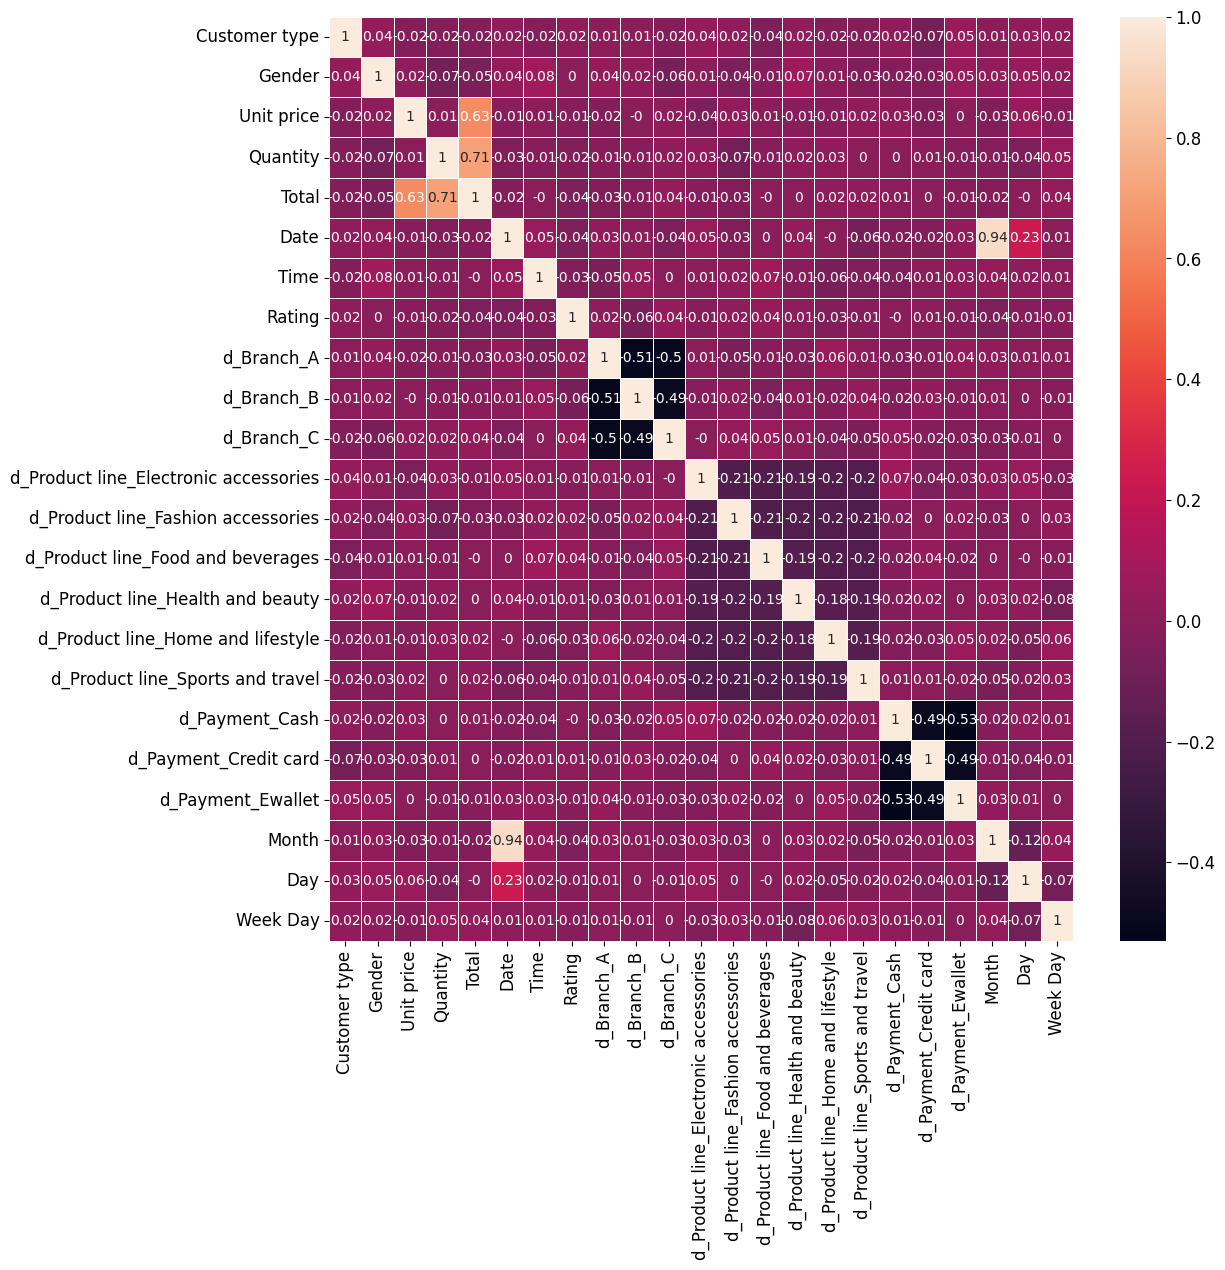

In [978]:
fig, ax = plt.subplots(figsize=(12,12))    
correlation_matrix = dataset.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [962]:
correlation_matrix["Total"].sort_values(ascending=False)

Tax 5%                                   1.00
Cost of Goods Sold                       1.00
gross income                             1.00
Total                                    1.00
Quantity                                 0.71
Unit price                               0.63
Week Day                                 0.04
d_City_Naypyitaw                         0.04
d_Branch_C                               0.04
d_Product line_Home and lifestyle        0.02
d_Product line_Sports and travel         0.02
d_Payment_Cash                           0.01
Time                                    -0.00
d_Payment_Credit card                    0.00
Day                                     -0.00
d_Product line_Food and beverages       -0.00
d_Product line_Health and beauty         0.00
d_Payment_Ewallet                       -0.01
d_Branch_B                              -0.01
d_City_Mandalay                         -0.01
d_Product line_Electronic accessories   -0.01
Customer type                     

Como a correlação entre 'gross income', 'Cost of Goods Sold', 'Total' e 'Tax 5%' é igual a 1.00, vamos manter apenas 'Total' em nosso modelo.

In [963]:
column_names = ['Tax 5%', 'Cost of Goods Sold', 'gross income']
for column_name in column_names:
  drop_column(column_name)

In [966]:
correlation_matrix["d_Branch_A"].sort_values(ascending=False)

d_Branch_A                               1.00
d_City_Yangon                            1.00
d_Product line_Home and lifestyle        0.06
d_Payment_Ewallet                        0.04
Gender                                   0.04
Date                                     0.03
Month                                    0.03
Rating                                   0.02
Customer type                            0.01
d_Product line_Sports and travel         0.01
Week Day                                 0.01
d_Product line_Electronic accessories    0.01
Day                                      0.01
d_Payment_Credit card                   -0.01
Quantity                                -0.01
d_Product line_Food and beverages       -0.01
Unit price                              -0.02
Total                                   -0.03
d_Product line_Health and beauty        -0.03
d_Payment_Cash                          -0.03
d_Product line_Fashion accessories      -0.05
Time                              

A correlação entre 'd_Branch_A' e 'd_City_Yangon' é 1.00. Vamos remover 'd_City_Yangon'.

In [967]:
drop_column('d_City_Yangon')

In [968]:
correlation_matrix["d_Branch_B"].sort_values(ascending=False)

d_Branch_B                               1.00
d_City_Mandalay                          1.00
Time                                     0.05
d_Product line_Sports and travel         0.04
d_Payment_Credit card                    0.03
Gender                                   0.02
d_Product line_Fashion accessories       0.02
Customer type                            0.01
Date                                     0.01
d_Product line_Health and beauty         0.01
Month                                    0.01
Unit price                              -0.00
Day                                      0.00
Total                                   -0.01
d_Payment_Ewallet                       -0.01
Week Day                                -0.01
Quantity                                -0.01
d_Product line_Electronic accessories   -0.01
d_Payment_Cash                          -0.02
d_Product line_Home and lifestyle       -0.02
d_Product line_Food and beverages       -0.04
Rating                            

A correlação entre 'd_Branch_B' e 'd_City_Mandalay' é 1.00. Vamos remover 'd_City_Mandalay'.

In [969]:
drop_column('d_City_Mandalay')

In [970]:
correlation_matrix["d_Branch_C"].sort_values(ascending=False)

d_City_Naypyitaw                         1.00
d_Branch_C                               1.00
d_Payment_Cash                           0.05
d_Product line_Food and beverages        0.05
Rating                                   0.04
d_Product line_Fashion accessories       0.04
Total                                    0.04
Quantity                                 0.02
Unit price                               0.02
d_Product line_Health and beauty         0.01
Week Day                                 0.00
Time                                     0.00
d_Product line_Electronic accessories   -0.00
Day                                     -0.01
Customer type                           -0.02
d_Payment_Credit card                   -0.02
Month                                   -0.03
d_Payment_Ewallet                       -0.03
d_Product line_Home and lifestyle       -0.04
Date                                    -0.04
d_Product line_Sports and travel        -0.05
Gender                            

A correlação entre 'd_Branch_C' e 'd_City_Naypyitaw' é 1.00. Vamos remover 'd_City_Naypyitaw'.

In [971]:
drop_column('d_City_Naypyitaw')

In [972]:
correlation_matrix["Unit price"].sort_values(ascending=False)

Unit price                               1.00
Total                                    0.63
Day                                      0.06
d_Product line_Fashion accessories       0.03
d_Payment_Cash                           0.03
Gender                                   0.02
d_Branch_C                               0.02
d_City_Naypyitaw                         0.02
d_Product line_Sports and travel         0.02
Quantity                                 0.01
d_Product line_Food and beverages        0.01
Time                                     0.01
d_Payment_Ewallet                        0.00
d_City_Mandalay                         -0.00
d_Branch_B                              -0.00
Week Day                                -0.01
Date                                    -0.01
Rating                                  -0.01
d_Product line_Health and beauty        -0.01
d_Product line_Home and lifestyle       -0.01
d_Branch_A                              -0.02
Customer type                     

In [977]:
correlation_matrix["Date"].sort_values(ascending=False)

Date                                     1.00
Month                                    0.94
Day                                      0.23
Time                                     0.05
d_Product line_Electronic accessories    0.05
d_Product line_Health and beauty         0.04
Gender                                   0.04
d_Branch_A                               0.03
d_Payment_Ewallet                        0.03
Customer type                            0.02
Week Day                                 0.01
d_Branch_B                               0.01
d_Product line_Home and lifestyle       -0.00
d_Product line_Food and beverages        0.00
Unit price                              -0.01
d_Payment_Credit card                   -0.02
Total                                   -0.02
d_Payment_Cash                          -0.02
Quantity                                -0.03
d_Product line_Fashion accessories      -0.03
d_Branch_C                              -0.04
Rating                            

In [975]:
correlation_matrix["Quantity"].sort_values(ascending=False)

Quantity                                 1.00
Total                                    0.71
Week Day                                 0.05
d_Product line_Electronic accessories    0.03
d_Product line_Home and lifestyle        0.03
d_Branch_C                               0.02
d_Product line_Health and beauty         0.02
Unit price                               0.01
d_Payment_Credit card                    0.01
d_Product line_Sports and travel         0.00
d_Payment_Cash                           0.00
d_Branch_A                              -0.01
d_Payment_Ewallet                       -0.01
d_Branch_B                              -0.01
Time                                    -0.01
Month                                   -0.01
d_Product line_Food and beverages       -0.01
Customer type                           -0.02
Rating                                  -0.02
Date                                    -0.03
Day                                     -0.04
Gender                            

In [983]:
correlation_matrix["d_Product line_Fashion accessories"].sort_values(ascending=False)

d_Product line_Fashion accessories       1.00
d_Branch_C                               0.04
Unit price                               0.03
Week Day                                 0.03
d_Branch_B                               0.02
Customer type                            0.02
Time                                     0.02
d_Payment_Ewallet                        0.02
Rating                                   0.02
Day                                      0.00
d_Payment_Credit card                    0.00
d_Payment_Cash                          -0.02
Month                                   -0.03
Total                                   -0.03
Date                                    -0.03
Gender                                  -0.04
d_Branch_A                              -0.05
Quantity                                -0.07
d_Product line_Health and beauty        -0.20
d_Product line_Home and lifestyle       -0.20
d_Product line_Electronic accessories   -0.21
d_Product line_Food and beverages 

In [984]:
correlation_matrix["d_Product line_Health and beauty"].sort_values(ascending=False)

d_Product line_Health and beauty         1.00
Gender                                   0.07
Date                                     0.04
Month                                    0.03
d_Payment_Credit card                    0.02
Quantity                                 0.02
Customer type                            0.02
Day                                      0.02
d_Branch_C                               0.01
d_Branch_B                               0.01
Rating                                   0.01
Total                                    0.00
d_Payment_Ewallet                        0.00
Time                                    -0.01
Unit price                              -0.01
d_Payment_Cash                          -0.02
d_Branch_A                              -0.03
Week Day                                -0.08
d_Product line_Home and lifestyle       -0.18
d_Product line_Electronic accessories   -0.19
d_Product line_Food and beverages       -0.19
d_Product line_Sports and travel  

In [985]:
correlation_matrix["d_Product line_Home and lifestyle"].sort_values(ascending=False)

d_Product line_Home and lifestyle        1.00
d_Branch_A                               0.06
Week Day                                 0.06
d_Payment_Ewallet                        0.05
Quantity                                 0.03
Total                                    0.02
Month                                    0.02
Gender                                   0.01
Date                                    -0.00
Unit price                              -0.01
Customer type                           -0.02
d_Payment_Cash                          -0.02
d_Branch_B                              -0.02
d_Payment_Credit card                   -0.03
Rating                                  -0.03
d_Branch_C                              -0.04
Day                                     -0.05
Time                                    -0.06
d_Product line_Health and beauty        -0.18
d_Product line_Sports and travel        -0.19
d_Product line_Food and beverages       -0.20
d_Product line_Electronic accessor

In [986]:
correlation_matrix["d_Product line_Electronic accessories"].sort_values(ascending=False)

d_Product line_Electronic accessories    1.00
d_Payment_Cash                           0.07
Date                                     0.05
Day                                      0.05
Customer type                            0.04
Month                                    0.03
Quantity                                 0.03
d_Branch_A                               0.01
Time                                     0.01
Gender                                   0.01
d_Branch_C                              -0.00
d_Branch_B                              -0.01
Total                                   -0.01
Rating                                  -0.01
Week Day                                -0.03
d_Payment_Ewallet                       -0.03
Unit price                              -0.04
d_Payment_Credit card                   -0.04
d_Product line_Health and beauty        -0.19
d_Product line_Home and lifestyle       -0.20
d_Product line_Sports and travel        -0.20
d_Product line_Food and beverages 

In [987]:
correlation_matrix["d_Product line_Food and beverages"].sort_values(ascending=False)

d_Product line_Food and beverages        1.00
Time                                     0.07
d_Branch_C                               0.05
d_Payment_Credit card                    0.04
Rating                                   0.04
Unit price                               0.01
Total                                   -0.00
Month                                    0.00
Day                                     -0.00
Date                                     0.00
Gender                                  -0.01
Week Day                                -0.01
Quantity                                -0.01
d_Branch_A                              -0.01
d_Payment_Cash                          -0.02
d_Payment_Ewallet                       -0.02
Customer type                           -0.04
d_Branch_B                              -0.04
d_Product line_Health and beauty        -0.19
d_Product line_Home and lifestyle       -0.20
d_Product line_Sports and travel        -0.20
d_Product line_Electronic accessor

In [988]:
correlation_matrix["d_Product line_Sports and travel"].sort_values(ascending=False)

d_Product line_Sports and travel         1.00
d_Branch_B                               0.04
Week Day                                 0.03
Total                                    0.02
Unit price                               0.02
d_Branch_A                               0.01
d_Payment_Cash                           0.01
d_Payment_Credit card                    0.01
Quantity                                 0.00
Rating                                  -0.01
Customer type                           -0.02
d_Payment_Ewallet                       -0.02
Day                                     -0.02
Gender                                  -0.03
Time                                    -0.04
Month                                   -0.05
d_Branch_C                              -0.05
Date                                    -0.06
d_Product line_Health and beauty        -0.19
d_Product line_Home and lifestyle       -0.19
d_Product line_Electronic accessories   -0.20
d_Product line_Food and beverages 

In [976]:
correlation_matrix["Rating"].sort_values(ascending=False)

Rating                                   1.00
d_Branch_C                               0.04
d_Product line_Food and beverages        0.04
d_Branch_A                               0.02
Customer type                            0.02
d_Product line_Fashion accessories       0.02
d_Product line_Health and beauty         0.01
d_Payment_Credit card                    0.01
Gender                                   0.00
d_Payment_Cash                          -0.00
Week Day                                -0.01
Unit price                              -0.01
d_Product line_Electronic accessories   -0.01
d_Product line_Sports and travel        -0.01
d_Payment_Ewallet                       -0.01
Day                                     -0.01
Quantity                                -0.02
Time                                    -0.03
d_Product line_Home and lifestyle       -0.03
Date                                    -0.04
Total                                   -0.04
Month                             

In [989]:
correlation_matrix["d_Payment_Credit card"].sort_values(ascending=False)

d_Payment_Credit card                    1.00
d_Product line_Food and beverages        0.04
d_Branch_B                               0.03
d_Product line_Health and beauty         0.02
Quantity                                 0.01
Time                                     0.01
d_Product line_Sports and travel         0.01
Rating                                   0.01
Total                                    0.00
d_Product line_Fashion accessories       0.00
d_Branch_A                              -0.01
Week Day                                -0.01
Month                                   -0.01
d_Branch_C                              -0.02
Date                                    -0.02
Gender                                  -0.03
Unit price                              -0.03
d_Product line_Home and lifestyle       -0.03
d_Product line_Electronic accessories   -0.04
Day                                     -0.04
Customer type                           -0.07
d_Payment_Cash                    

In [990]:
correlation_matrix["d_Payment_Cash"].sort_values(ascending=False)

d_Payment_Cash                           1.00
d_Product line_Electronic accessories    0.07
d_Branch_C                               0.05
Unit price                               0.03
Day                                      0.02
Customer type                            0.02
Total                                    0.01
d_Product line_Sports and travel         0.01
Week Day                                 0.01
Rating                                  -0.00
Quantity                                 0.00
Month                                   -0.02
Date                                    -0.02
Gender                                  -0.02
d_Branch_B                              -0.02
d_Product line_Home and lifestyle       -0.02
d_Product line_Health and beauty        -0.02
d_Product line_Fashion accessories      -0.02
d_Product line_Food and beverages       -0.02
d_Branch_A                              -0.03
Time                                    -0.04
d_Payment_Credit card             

In [992]:
correlation_matrix["d_Payment_Ewallet"].sort_values(ascending=False)

d_Payment_Ewallet                        1.00
Gender                                   0.05
Customer type                            0.05
d_Product line_Home and lifestyle        0.05
d_Branch_A                               0.04
Date                                     0.03
Time                                     0.03
Month                                    0.03
d_Product line_Fashion accessories       0.02
Day                                      0.01
Unit price                               0.00
d_Product line_Health and beauty         0.00
Week Day                                 0.00
Quantity                                -0.01
Total                                   -0.01
Rating                                  -0.01
d_Branch_B                              -0.01
d_Product line_Food and beverages       -0.02
d_Product line_Sports and travel        -0.02
d_Product line_Electronic accessories   -0.03
d_Branch_C                              -0.03
d_Payment_Credit card             

In [1001]:
correlation_matrix["Day"].sort_values(ascending=False)

Day                                      1.00
Date                                     0.23
Unit price                               0.06
d_Product line_Electronic accessories    0.05
Gender                                   0.05
Customer type                            0.03
Time                                     0.02
d_Payment_Cash                           0.02
d_Product line_Health and beauty         0.02
d_Branch_A                               0.01
d_Payment_Ewallet                        0.01
d_Product line_Food and beverages       -0.00
Total                                   -0.00
d_Product line_Fashion accessories       0.00
d_Branch_B                               0.00
Rating                                  -0.01
d_Branch_C                              -0.01
d_Product line_Sports and travel        -0.02
Quantity                                -0.04
d_Payment_Credit card                   -0.04
d_Product line_Home and lifestyle       -0.05
Week Day                          

In [997]:
correlation_matrix["Week Day"].sort_values(ascending=False)

Week Day                                 1.00
d_Product line_Home and lifestyle        0.06
Quantity                                 0.05
Total                                    0.04
Month                                    0.04
d_Product line_Fashion accessories       0.03
d_Product line_Sports and travel         0.03
Customer type                            0.02
Gender                                   0.02
Date                                     0.01
Time                                     0.01
d_Payment_Cash                           0.01
d_Branch_A                               0.01
d_Payment_Ewallet                        0.00
d_Branch_C                               0.00
Unit price                              -0.01
Rating                                  -0.01
d_Product line_Food and beverages       -0.01
d_Branch_B                              -0.01
d_Payment_Credit card                   -0.01
d_Product line_Electronic accessories   -0.03
Day                               

In [998]:
correlation_matrix["Time"].sort_values(ascending=False)

Time                                     1.00
Gender                                   0.08
d_Product line_Food and beverages        0.07
d_Branch_B                               0.05
Date                                     0.05
Month                                    0.04
d_Payment_Ewallet                        0.03
d_Product line_Fashion accessories       0.02
Day                                      0.02
d_Payment_Credit card                    0.01
Unit price                               0.01
Week Day                                 0.01
d_Product line_Electronic accessories    0.01
Total                                   -0.00
d_Branch_C                               0.00
d_Product line_Health and beauty        -0.01
Quantity                                -0.01
Customer type                           -0.02
Rating                                  -0.03
d_Payment_Cash                          -0.04
d_Product line_Sports and travel        -0.04
d_Branch_A                        

<Axes: >

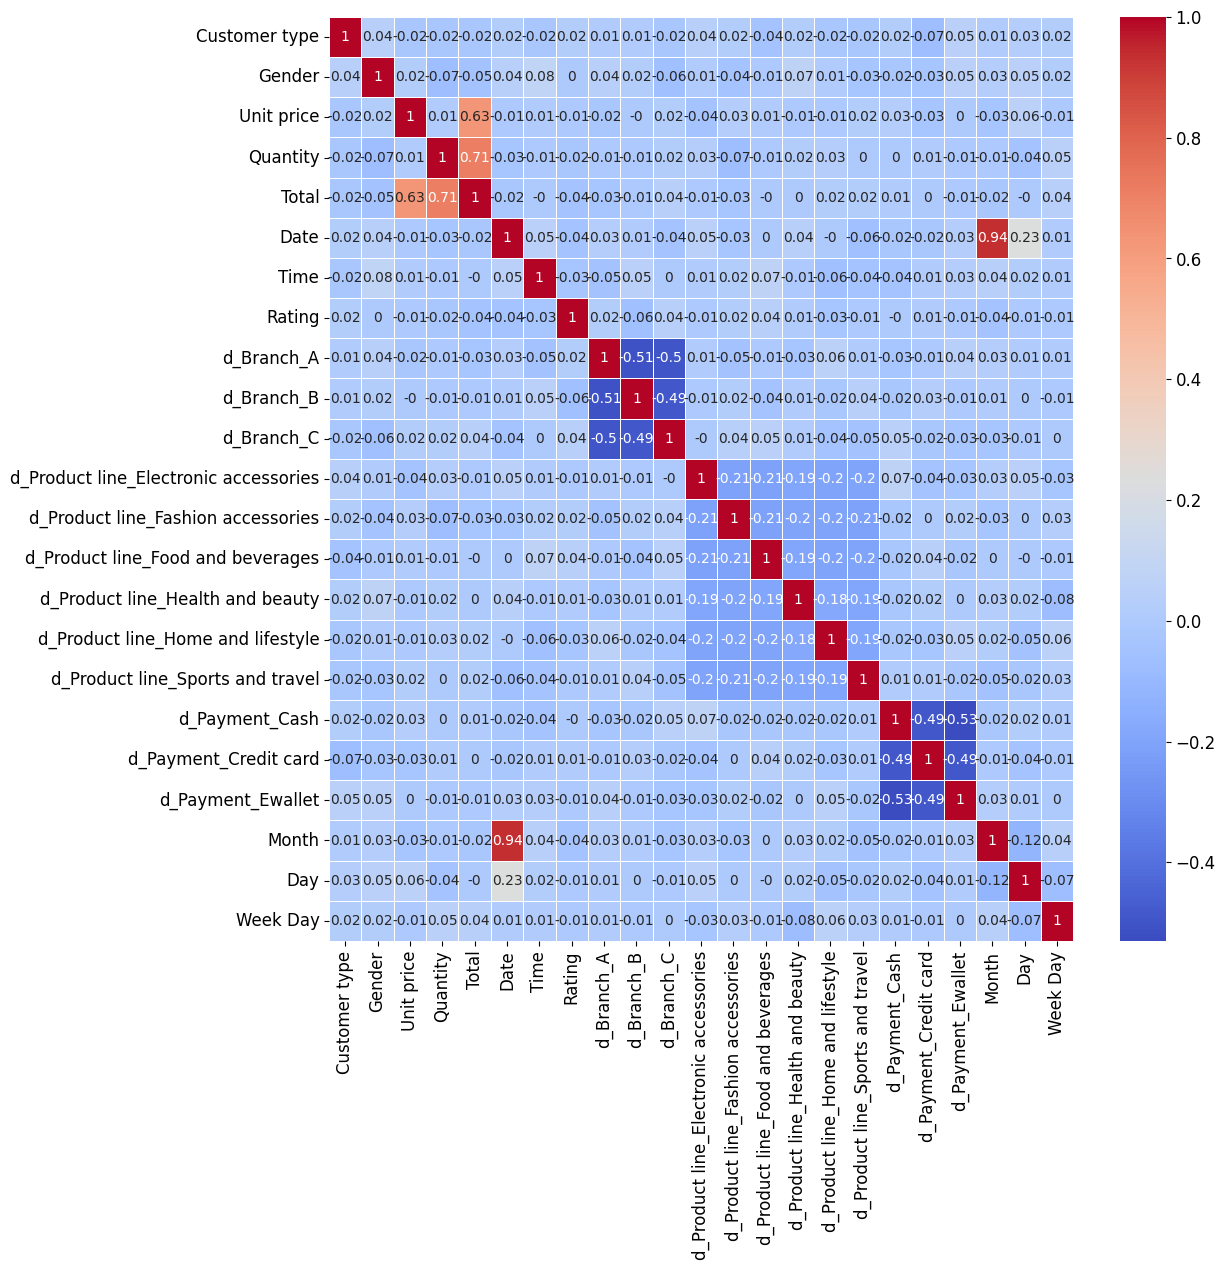

In [1034]:
fig, ax = plt.subplots(figsize=(12,12))    
correlation_matrix = dataset.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap='coolwarm')

## Explorando Métricas dos Tipos Numéricos

In [999]:
dataset.describe()

,Customer type,Gender,Unit price,Quantity,Total,Date,Time,Rating,Month,Day,Week Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.499000,0.499000,55.672130,5.510000,322.966749,2019-02-14 00:05:45.600000,14.910000,6.97270,1.993000,15.256000,3.032000
min,0.000000,0.000000,10.080000,1.000000,10.678500,2019-01-01 00:00:00,10.000000,4.00000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,32.875000,3.000000,124.422375,2019-01-24 00:00:00,12.000000,5.50000,1.000000,8.000000,1.000000
50%,0.000000,0.000000,55.230000,5.000000,253.848000,2019-02-13 00:00:00,15.000000,7.00000,2.000000,15.000000,3.000000
75%,1.000000,1.000000,77.935000,8.000000,471.350250,2019-03-08 00:00:00,18.000000,8.50000,3.000000,23.000000,5.000000
max,1.000000,1.000000,99.960000,10.000000,1042.650000,2019-03-30 00:00:00,20.000000,10.00000,3.000000,31.000000,6.000000
std,0.500249,0.500249,26.494628,2.923431,245.885335,NaN,3.186857,1.71858,0.835254,8.693563,1.973543


## Construindo Histogramas para os Dados

array([[<Axes: title={'center': 'Customer type'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Unit price'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Week Day'}>, <Axes: >]], dtype=object)

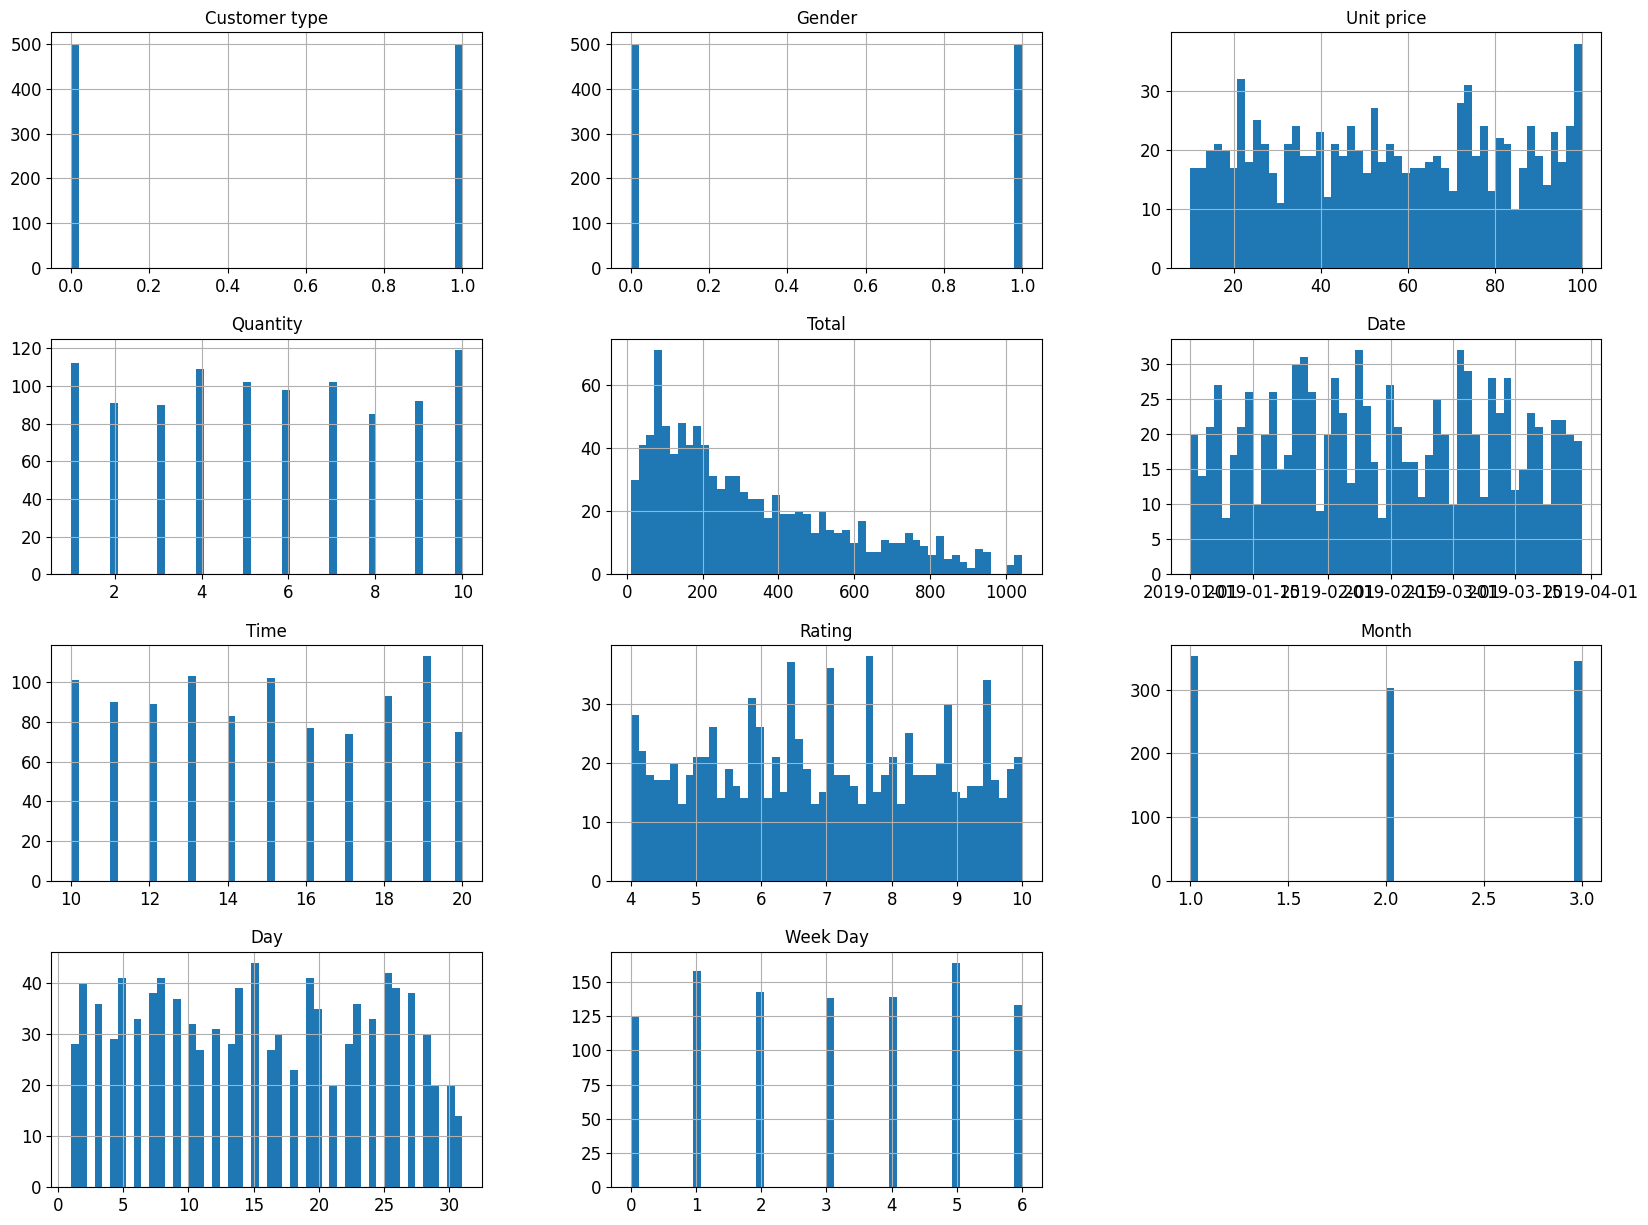

In [1000]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

Customer type                          1000 non-null   int64         
 1   Gender                                 1000 non-null   int64         
 2   Unit price                             1000 non-null   float64       
 3   Quantity                               1000 non-null   int64         
 4   Total                                  1000 non-null   float64       
 5   Date                                   1000 non-null   datetime64[ns]
 6   Time                                   1000 non-null   int32         
 7   Rating                                 1000 non-null   float64       
 8   d_Branch_A                             1000 non-null   bool          
 9   d_Branch_B                             1000 non-null   bool          
 10  d_Branch_C                             1000 non-null   bool          
 11  d_Product line_Electronic accessories  1000 non-null   bool          
 12  d_Product line_Fashion accessories     1000 non-null   bool          
 13  d_Product line_Food and beverages      1000 non-null   bool          
 14  d_Product line_Health and beauty       1000 non-null   bool          
 15  d_Product line_Home and lifestyle      1000 non-null   bool          
 16  d_Product line_Sports and travel       1000 non-null   bool          
 17  d_Payment_Cash                         1000 non-null   bool          
 18  d_Payment_Credit card                  1000 non-null   bool          
 19  d_Payment_Ewallet                      1000 non-null   bool          
 20  Month                                  1000 non-null   int32         
 21  Day                                    1000 non-null   int32         
 22  Week Day                               1000 non-null   int32  

# Separando Bases de Treino e Teste

In [1024]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Customer type                          1000 non-null   int64         
 1   Gender                                 1000 non-null   int64         
 2   Unit price                             1000 non-null   float64       
 3   Quantity                               1000 non-null   int64         
 4   Total                                  1000 non-null   float64       
 5   Date                                   1000 non-null   datetime64[ns]
 6   Time                                   1000 non-null   int32         
 7   Rating                                 1000 non-null   float64       
 8   d_Branch_A                             1000 non-null   bool          
 9   d_Branch_B                             1000 non-null   bool     

In [1068]:
from sklearn.model_selection import train_test_split

X = dataset[['Customer type', 'Gender','Unit price', 'Quantity', 'Rating', 
'd_Branch_A', 'd_Branch_B', 'd_Branch_C', 
'd_Product line_Electronic accessories', 'd_Product line_Fashion accessories', 'd_Product line_Food and beverages', 
'd_Product line_Health and beauty', 'd_Product line_Home and lifestyle', 'd_Product line_Sports and travel', 
'd_Payment_Cash', 'd_Payment_Credit card', 'd_Payment_Ewallet', 
#'Date', 
'Time','Month', 'Day', 'Week Day'] 
]  
y = dataset['Total'].values.reshape(-1, 1)

In [1069]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [1070]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Verificando as divisões
print("X_train: ", len(X_train))
print("X_test : ", len(X_test))
print("\ny_train: ", len(y_train))
print("y_test : ", len(y_test))

X_train:  800
X_test :  200

y_train:  800
y_test :  200


In [1071]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1072]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [1073]:
y_pred = model.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Calcular o MAPE
mape_result = calculate_mape(insurance_labels, insurance_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

Mean Absolute Error (MAE): 0.2408528427415223
Mean Squared Error: 0.10527850076243156
R² Score: 0.9022620987015992
O MAPE é: 11.08%


In [1086]:
# Criando o modelo de DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [1087]:
y_pred = model.predict(X_test)

# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Calcular o MAPE
mape_result = calculate_mape(insurance_labels, insurance_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

Mean Absolute Error (MAE): 0.13352117533208158
Mean Squared Error: 0.029677766203456545
R² Score: 0.9724479113689513
O MAPE é: 11.08%
